In [1]:
#importing libraries
import PIL
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from sklearn.decomposition import PCA

In [2]:
#data normalisation of 3D array
def norm(array):
    a = np.amin(array)
    b = np.amax(array)
    array = (array-a)/(b-a)
    return array

In [3]:
#non linear activation functions
def ReLU(x):
    return np.maximum(0,x)
def sigmoid(x):
    return 1/(1+np.exp(-1*x))
def tanh(x):
    return (1-np.exp(-2*x))/(1+np.exp(-2*x))
def PReLU(x):
    if x>0:
        return x
    else:
        return 0.01*x

In [4]:
#CONVOLUTION FUNCTION
#padding is a list of height and weight paddings
#Takes image as input in array form 

Text(0.5, 1.0, 'output activation map')

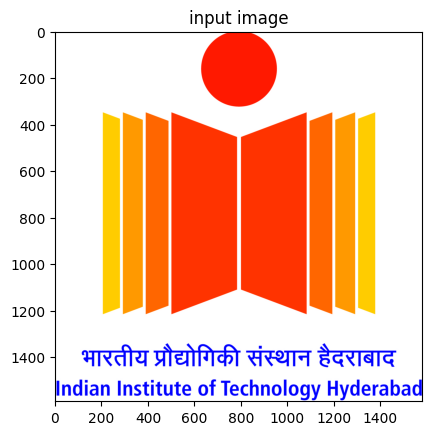

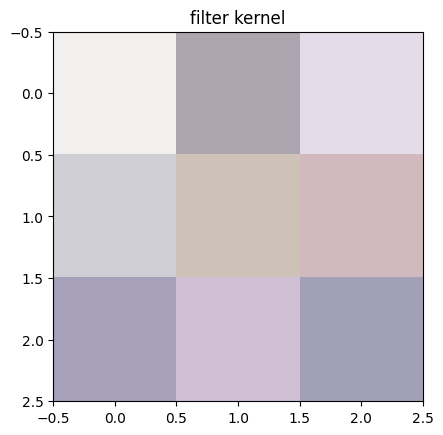

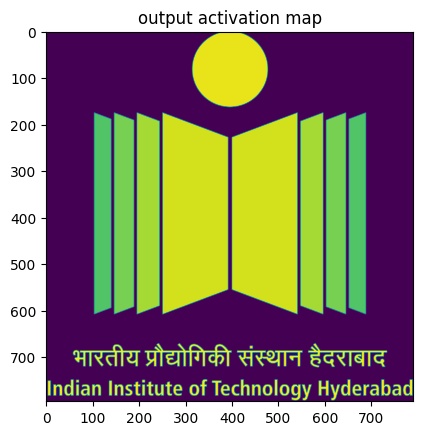

In [5]:
def multiply(a,b):
    sum = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            sum = sum + np.dot(a[i][j],b[i][j])
    return sum
def conv(img,kernel,activation,stride=1,padding=[0,0]):
    pad_h = np.zeros((padding[0],img.shape[1],img.shape[2]))
    img = np.concatenate((pad_h,img),axis=0)
    img = np.concatenate((img,pad_h),axis=0)
    pad_w = np.zeros((img.shape[0],padding[1],img.shape[2]))
    img = np.concatenate((pad_w,img),axis=1)
    img = np.concatenate((img,pad_w),axis=1)
    a = int((img.shape[0]-kernel.shape[0])/stride) + 1
    b = int((img.shape[1]-kernel.shape[1])/stride) + 1
    out = np.empty((a,b))
    for i in range(a):
        for j in range(b):
            output = multiply(img[i*stride:i*stride+kernel.shape[0],j*stride:j*stride+kernel.shape[1],:],kernel)
            out[i][j] = activation(output)
    return norm(out)
#image selection
image = Image.open(r'C:\Users\Naresh Bandaru\OneDrive\Desktop\Deep Learning\Building a CNN\iith.jpg')
plt.figure()
plt.imshow(image)
plt.title('input image')
np_img = norm(np.array(image))
kernel = np.random.rand(3,3,np_img.shape[2])*0.5
plt.figure()
plt.imshow(kernel)
plt.title('filter kernel')
output1 = conv(np_img,kernel,PReLU,2,[2,2])
plt.figure()
plt.imshow(output1)
plt.title('output activation map')

In [6]:
#POOLING FUNCTION
#pool is of m*n dimension(default is 3*3 with stride 3)
#output1 is output of convolution function

Text(0.5, 1.0, 'pooled output')

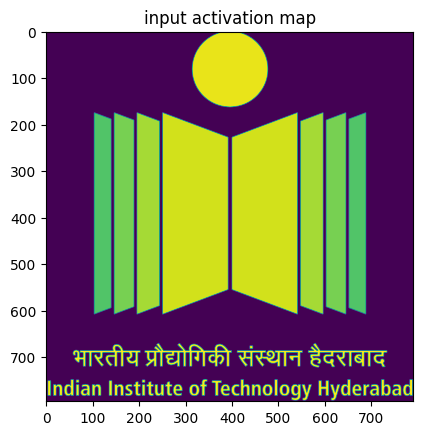

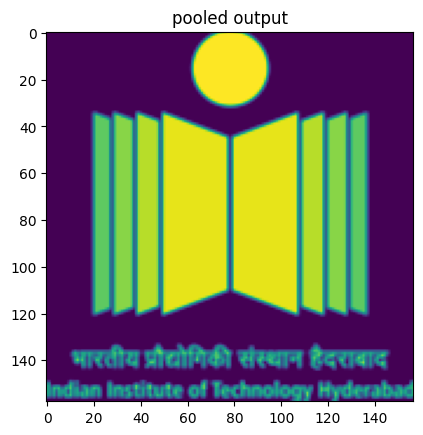

In [7]:
def pool(layer,func,stride=3,m=3,n=3):
    out = np.empty((int((layer.shape[0]-m)/stride)+1,int((layer.shape[1]-n)/stride)+1))
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if func == 'max':
                out[i][j] = np.amax(layer[i*stride:i*stride+m,j*stride:j*stride+n])
            elif func == 'avg':
                out[i][j] = np.mean(layer[i*stride:i*stride+m,j*stride:j*stride+n])
    return norm(out)
plt.figure()
plt.imshow(output1)
plt.title('input activation map')
plt.figure()
plt.imshow(pool(output1,'avg',5,10,10))
plt.title('pooled output')

In [8]:
#CONVOLUTION LAYER FUNCTION

Text(0.5, 0.98, 'output activation map')

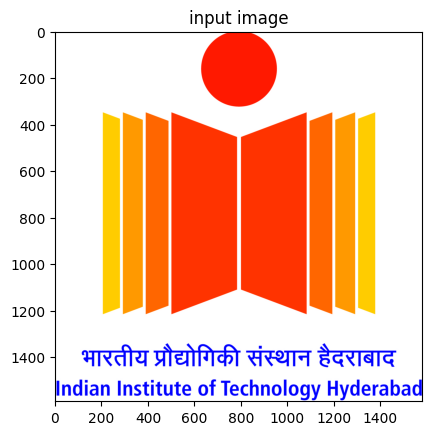

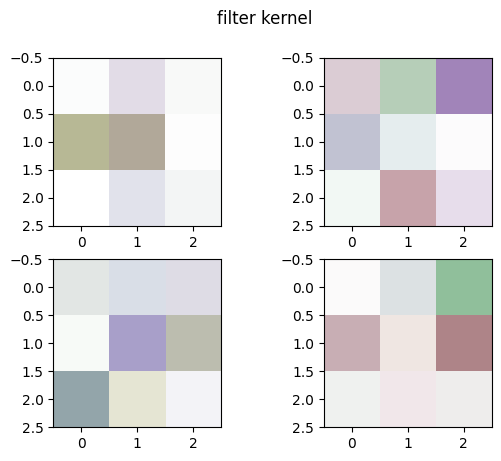

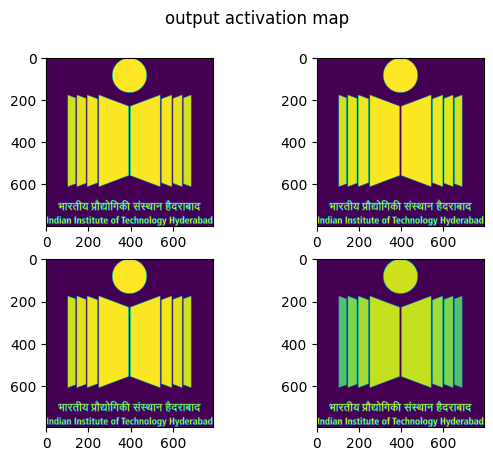

In [9]:
def conv_layer(img,D,k_dim,activation,stride=1,padding=[0,0]):
    kernels = np.empty((D,k_dim[0],k_dim[1],k_dim[2]))
    a = int((img.shape[0]-k_dim[0]+2*padding[0])/stride) + 1
    b = int((img.shape[1]-k_dim[1]+2*padding[1])/stride) + 1
    out = np.empty((D,a,b))
    for i in range(D):
        kernels[i] = np.random.rand(k_dim[0],k_dim[1],k_dim[2])*0.5
        out[i] = conv(img,kernels[i],activation,stride,padding)
    return norm(out),kernels
plt.figure()
plt.imshow(image)
plt.title('input image')
output3,kernels = conv_layer(np_img,4,[3,3,np_img.shape[2]],sigmoid,2,[2,2])
fig1 = plt.figure()
for i in range(4):
    fig1.add_subplot(2,2,i+1)
    plt.imshow(kernels[i])
fig1.suptitle('filter kernel')
fig2 = plt.figure()
for i in range(4):
    fig2.add_subplot(2,2,i+1)
    plt.imshow(output3[i])
fig2.suptitle('output activation map')

In [10]:
#POOLING LAYER FUNCTION
#pooling is done on m*n dimension(deafult of 3*3 with stride 3)
#output3 is output from convolution layer function

Text(0.5, 0.98, 'output volume')

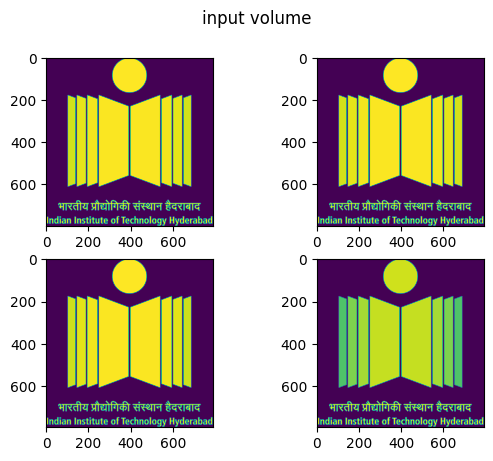

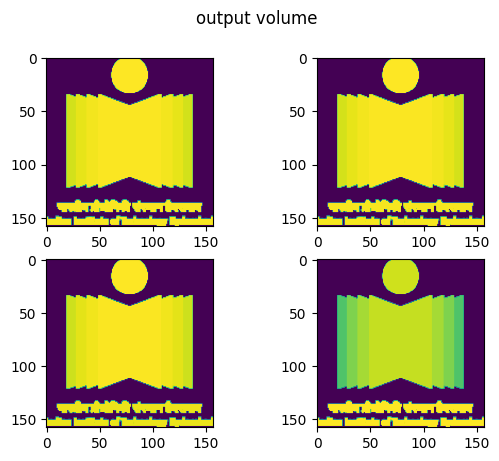

In [11]:
def pool_layer(layer,func,stride=3,m=3,n=3):
    if func == 'GAP':
        out = np.empty(layer.shape)
        for i in range(out.shape[0]):
            out[i] = np.mean(layer[i])
    else:
        out = np.empty((layer.shape[0],int((layer.shape[1]-m)/stride)+1,int((layer.shape[2]-n)/stride)+1))
        for i in range(out.shape[0]):
            out[i] = pool(layer[i],func,stride,m,n)
    return norm(out)
fig1 = plt.figure()
for i in range(4):    
    fig1.add_subplot(2,2,i+1)
    plt.imshow(output3[i])
fig1.suptitle('input volume')
output4 = pool_layer(output3,'max',5,10,10)
fig2 = plt.figure()
for i in range(4):
    fig2.add_subplot(2,2,i+1)
    plt.imshow(output4[i])
fig2.suptitle('output volume')

In [12]:
#FLATTENING FUNCTION
#output4 is input from pool layer function
# n is the desired output size

In [13]:
def flat(array,n):
    array = array.reshape(-1)
    mult = np.random.rand(n,array.shape[0])*0.5
    out = np.matmul(mult,array)
    return norm(out)

In [14]:
#MLP FUNCTION
#softmax is on if its value is 1 and 0 otherwise
#n is number of hidden layers and sizes is the list of sizes of hidden layers

In [15]:
def mlp(input,n,sizes,activation,f_size,softmax):
    prev_layer = input
    for i in range(n):
        mult = np.random.rand(sizes[i],prev_layer.shape[0])*0.5
        prev_layer = np.matmul(mult,prev_layer)
        for j in range(prev_layer.shape[0]):
            prev_layer[j] = activation(prev_layer[j])
        prev_layer = norm(prev_layer)
    mult = np.random.rand(f_size,prev_layer.shape[0])*0.5
    out = np.matmul(mult,prev_layer)
    for i in range(out.shape[0]):
        out[i] = activation(out[i])
    out = norm(out)
    if softmax == 0:
        return norm(out)
    else:
        for i in range(out.shape[0]):
            out[i] = np.exp(out[i])
        sum = np.sum(out)
        for i in range(out.shape[0]):
            out[i] = out[i]/sum
        return out

In [26]:
#opening cifar-10 dataset
def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data
dataset = unpickle(r'C:\Users\Naresh Bandaru\OneDrive\Desktop\Deep Learning\Building a CNN\cifar-10-batches-py\data_batch_5')

In [27]:
#FEED-FORWARD PATH

[0.04879064 0.11636745 0.06654291 0.10329698 0.12744705 0.08734371
 0.1326267  0.08544852 0.10806268 0.12407334]


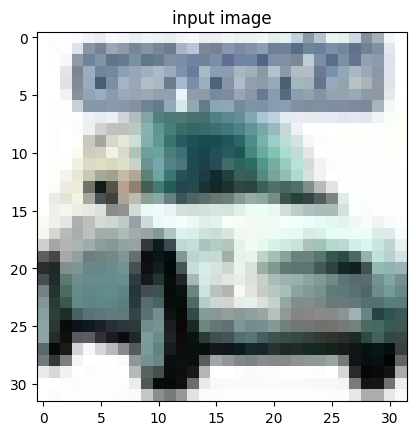

In [28]:
def cnn(img):
    convolution1,kernels1 = conv_layer(img,16,[3,3,img.shape[2]],sigmoid)
    pooling1 = pool_layer(convolution1,'max',2,2,2)
    pooling1 = pooling1.transpose((1,2,0))
    convolution2,kernels2 = conv_layer(pooling1,8,[3,3,pooling1.shape[2]],sigmoid)
    pooling2 = pool_layer(convolution2,'max',2,2,2)
    pooling3 = pool_layer(pooling2,'GAP')
    flat1 = flat(pooling3,15)
    final = mlp(flat1,1,[20],sigmoid,10,1)
    return final
np_img = dataset[b'data'][0].reshape((3,32,32)).transpose(1,2,0)
image = Image.fromarray(np_img,'RGB')
plt.figure()
plt.imshow(image)
plt.title('input image')
np_img = norm(np_img)
print(cnn(np_img))

In [29]:
#printing labels of dataset for selection
print(dataset[b'labels'])

[1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8, 2, 7, 0, 4, 1, 7, 7, 4, 4, 9, 9, 6, 2, 4, 1, 6, 4, 9, 6, 6, 9, 6, 9, 9, 5, 7, 1, 6, 8, 2, 9, 5, 9, 5, 3, 7, 1, 3, 3, 9, 1, 7, 8, 9, 7, 4, 3, 4, 9, 5, 8, 4, 9, 3, 6, 1, 1, 4, 3, 9, 9, 1, 9, 9, 2, 4, 3, 2, 4, 7, 1, 5, 1, 8, 6, 3, 6, 3, 4, 4, 9, 9, 9, 7, 0, 5, 7, 7, 4, 8, 8, 4, 2, 0, 5, 2, 4, 9, 1, 7, 7, 4, 8, 8, 8, 0, 2, 3, 6, 3, 9, 0, 8, 2, 2, 4, 8, 8, 1, 8, 5, 7, 6, 0, 9, 1, 4, 8, 2, 1, 0, 5, 1, 6, 5, 3, 4, 9, 9, 0, 3, 5, 4, 2, 6, 3, 9, 4, 9, 8, 6, 4, 1, 1, 9, 8, 2, 2, 1, 8, 5, 9, 7, 8, 1, 1, 4, 2, 4, 2, 0, 8, 8, 0, 0, 4, 3, 0, 7, 7, 6, 1, 6, 7, 1, 5, 6, 1, 7, 2, 4, 0, 2, 2, 5, 9, 3, 2, 1, 4, 1, 2, 9, 8, 5, 2, 3, 3, 4, 9, 7, 2, 3, 9, 7, 6, 2, 9, 7, 5, 4, 0, 8, 7, 2, 0, 3, 5, 1, 3, 1, 7, 8, 7, 9, 8, 2, 9, 1, 4, 8, 6, 7, 3, 6, 9, 7, 9, 4, 5, 8, 0, 5, 6, 6, 0, 8, 4, 6, 1, 4, 2, 2, 1, 8, 4, 4, 0, 2, 4, 1, 9, 8, 9, 0, 7, 1, 1, 6, 4, 7, 4, 6, 9, 3, 2, 7, 3, 7, 4, 5, 1, 9, 6, 3, 9, 6, 0, 7, 0, 0, 0, 6, 6, 9, 7, 3, 2, 0, 6, 7, 5, 0, 

In [30]:
#QUESTION 8a
#every index in list_a is chosen so that we get 10 images from different classes

In [31]:
list_a = [12,0,9,7,6,2,16,5,1,15]
for i in list_a:
    np_img = norm(dataset[b'data'][i].reshape((3,32,32)).transpose(1,2,0))
    print("output:\n",cnn(np_img))

output:
 [0.12747684 0.07121996 0.11587748 0.10024395 0.05037452 0.12364167
 0.07818695 0.07502069 0.13693214 0.1210258 ]
output:
 [0.16995594 0.06498977 0.09836311 0.06448631 0.13653403 0.09662205
 0.06993183 0.0625233  0.12229019 0.11430349]
output:
 [0.08010961 0.10900549 0.10367075 0.11452943 0.09432252 0.11769463
 0.12201705 0.10497443 0.04488756 0.10878851]
output:
 [0.08566636 0.05416034 0.09356137 0.08924414 0.1048805  0.09855386
 0.12683878 0.12805171 0.07181987 0.14722307]
output:
 [0.12543778 0.04795741 0.11385017 0.09457601 0.09091986 0.10428317
 0.08714205 0.13036176 0.1291967  0.0762751 ]
output:
 [0.11919418 0.07928085 0.1133893  0.12272477 0.04803308 0.12885544
 0.08848952 0.0681581  0.13056745 0.10130731]
output:
 [0.12482466 0.13096622 0.13261158 0.06894556 0.04878507 0.11695228
 0.1291061  0.07107822 0.12627839 0.05045191]
output:
 [0.12685697 0.13438152 0.05917245 0.05071057 0.0932202  0.09167905
 0.09821407 0.10757432 0.13784562 0.10034522]
output:
 [0.08850029 0.1

In [32]:
#observation
#values in the output vector are all close to 0.1 irrespective of the class of image
#the above CNN doesnt show discriminality for any class of images

In [33]:
#QUESTION 8b
#list_b is chosen so that it contains 3 images from each class

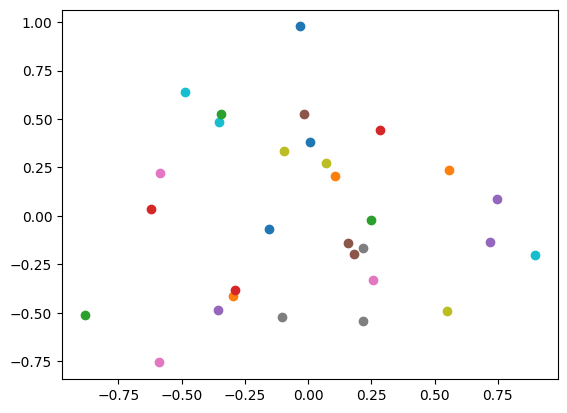

In [34]:
list_b = [12,18,22,0,3,13,9,11,17,7,54,57,6,23,27,2,4,14,16,31,35,5,10,21,1,8,19,15,29,30]
def cnn_bottleneck(img):
    convolution1,kernels1 = conv_layer(img,16,[3,3,img.shape[2]],sigmoid)
    pooling1 = pool_layer(convolution1,'max',2,2,2)
    pooling1 = pooling1.transpose((1,2,0))
    convolution2,kernels2 = conv_layer(pooling1,8,[3,3,pooling1.shape[2]],sigmoid)
    pooling2 = pool_layer(convolution2,'max',2,2,2)
    pooling3 = pool_layer(pooling2,'GAP')
    flat1 = flat(pooling3,15)
    return flat1
pca = PCA(n_components = 2)
matrix = np.empty((30,15))
for i in range(30):
    np_img = norm(dataset[b'data'][list_b[i]].reshape((3,32,32)).transpose(1,2,0))
    matrix[i] = cnn_bottleneck(np_img)
pca_matrix = pca.fit_transform(matrix)
for i in range(30):
    plt.scatter(pca_matrix[i][0],pca_matrix[i][1])

In [35]:
#Each colour in the above plot indicates a class
#We can observe that each color has 3 points indicating that each class of images has exactly 3 images taken into list_b